In [19]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px

In [3]:
# Load training set
df = pd.read_csv('train.csv')
df

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
...                     ...                     ...   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599  
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414  
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873  
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541  
...                ...                         ...         ...        ...  
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045            NONE        600 Block of EDNA ST -122.447364  37.731948  
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212  

[878049 rows x 9 columns]

In [17]:
# Set target feature of interest
crime_categories = df['Category'].value_counts(ascending=False)
crime_category_names = crime_categories.index

In [18]:
crime_categories

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [11]:
crime_category_names

Index(['TREA', 'PORNOGRAPHY/OBSCENE MAT', 'GAMBLING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'BRIBERY', 'BAD CHECKS',
       'FAMILY OFFENSES', 'SUICIDE', 'EMBEZZLEMENT', 'LOITERING', 'ARSON',
       'LIQUOR LAWS', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE', 'KIDNAPPING',
       'RECOVERED VEHICLE', 'DRUNKENNESS', 'DISORDERLY CONDUCT',
       'SEX OFFENSES FORCIBLE', 'STOLEN PROPERTY', 'TRESPASS', 'PROSTITUTION',
       'WEAPON LAWS', 'SECONDARY CODES', 'FORGERY/COUNTERFEITING', 'FRAUD',
       'ROBBERY', 'MISSING PERSON', 'SUSPICIOUS OCC', 'BURGLARY', 'WARRANTS',
       'VANDALISM', 'VEHICLE THEFT', 'DRUG/NARCOTIC', 'ASSAULT',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'LARCENY/THEFT'],
      dtype='object')

In [24]:
fig = px.pie(crime_categories, values=crime_categories.values, names=crime_categories.index, title="Overall repartition of crimes in San Francisco (2003-2015")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [25]:
df["Dates"] = pd.to_datetime(df["Dates"], format="%Y-%m-%d %H:%M:%S")
df["Hour"] = df["Dates"].map(lambda x: x.hour)
df["Month"] = df["Dates"].map(lambda x: x.month)
df["Year"] = df["Dates"].map(lambda x: x.year)

In [26]:
# Let's define a function to plot the distributions of categories of crime based on different temporal features

def plot_temporal_feature(df, time_feature, crime_category_names, xaxis_formatter=None, xtick_inc=None):
    
    # Set figure size
    fig = plt.figure(figsize=(50, 100))
    
    for i in range(len(crime_category_names)):
        p = plt.subplot(10, 4, i+1)
        crime = crime_category_names[i]
        cur_crime_data = df[df.Category == crime]
        temporal_data = cur_crime_data[time_feature].value_counts().sort_index()
        sns.lineplot(data=temporal_data)
        if xtick_inc:
            plt.xticks(np.arange(df[time_feature].unique().min(),df[time_feature].unique().max()+1, xtick_inc))
        plt.tick_params(axis = 'both', which = 'major', labelsize = 13)
        if xaxis_formatter:
            p.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: xaxis_formatter(x)))
    #     p.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        plt.ylabel("Frequency of Crime", fontsize=25)
        time_feature_str = str(time_feature).capitalize()
        plt.xlabel(time_feature_str, fontsize=25)
        plt.title("%s (%s)" % (crime, 'per '+ time_feature_str), fontsize=30)
    
    fig.savefig('visualizations/%s.png' % time_feature_str, bbox_inches='tight')

In [29]:
def convert_time(hour):
    d = datetime.strptime(str(hour), "%H")
    return d.strftime("%I:%M %p")

In [27]:
## Group dataset by crime occurences and time

# crime_per_time = pd.to_datetime(df['Dates'], format="%Y-%m-%d %H:%M:%S").dt.hour.value_counts().sort_index()
crime_per_time = df["Hour"].value_counts().sort_index()
crime_per_time

0     44865
1     26173
2     22296
3     14014
4      9863
5      8637
6     13133
7     22048
8     32900
9     35555
10    37806
11    38373
12    51934
13    43145
14    44424
15    48058
16    50137
17    53553
18    55104
19    49475
20    44694
21    43661
22    45741
23    42460
Name: Hour, dtype: int64

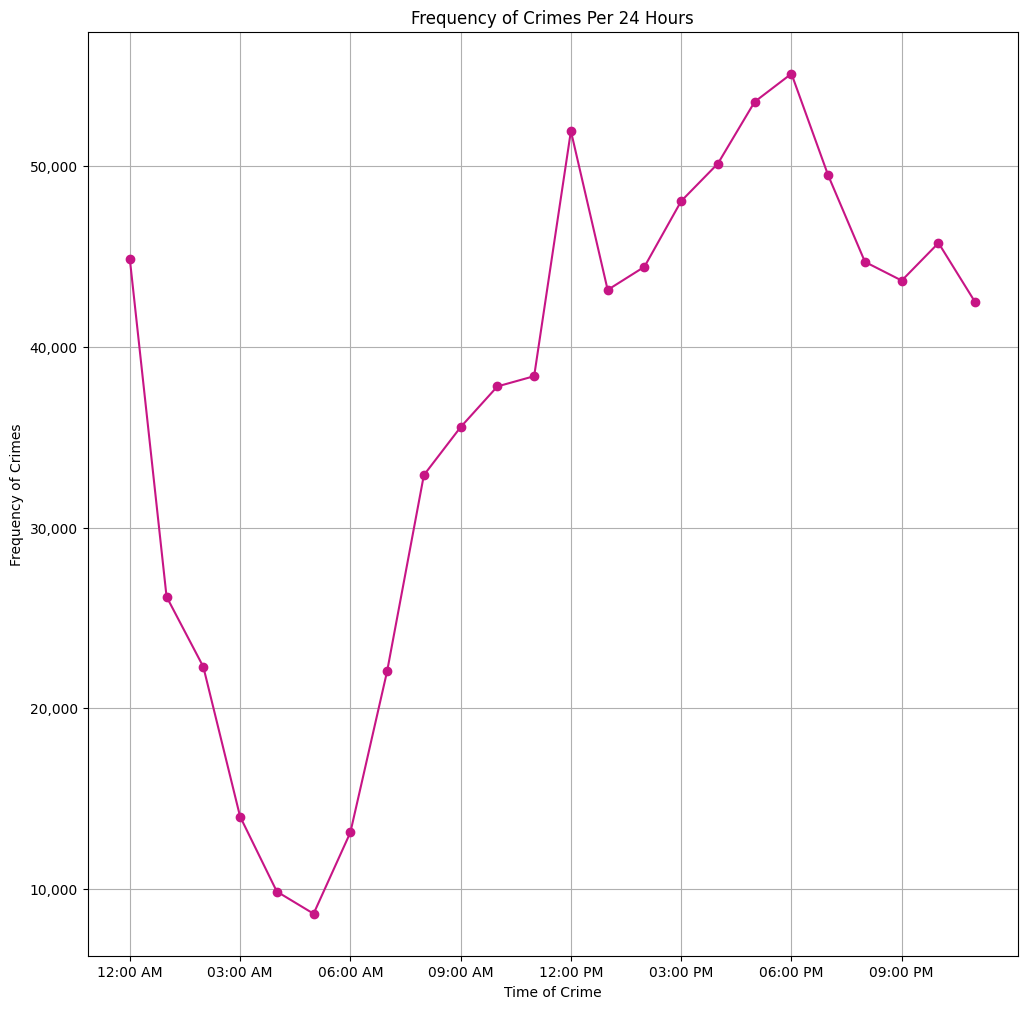

In [30]:
# Plot all crimes over the 24 hours
fig=plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per 24 Hours")
plt.xlabel("Time of Crime")
plt.ylabel("Frequency of Crimes")

ax = crime_per_time.plot(grid=True, marker='o', color='mediumvioletred')

ax.set_xticks(crime_per_time.index[::3])

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: convert_time(x)))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

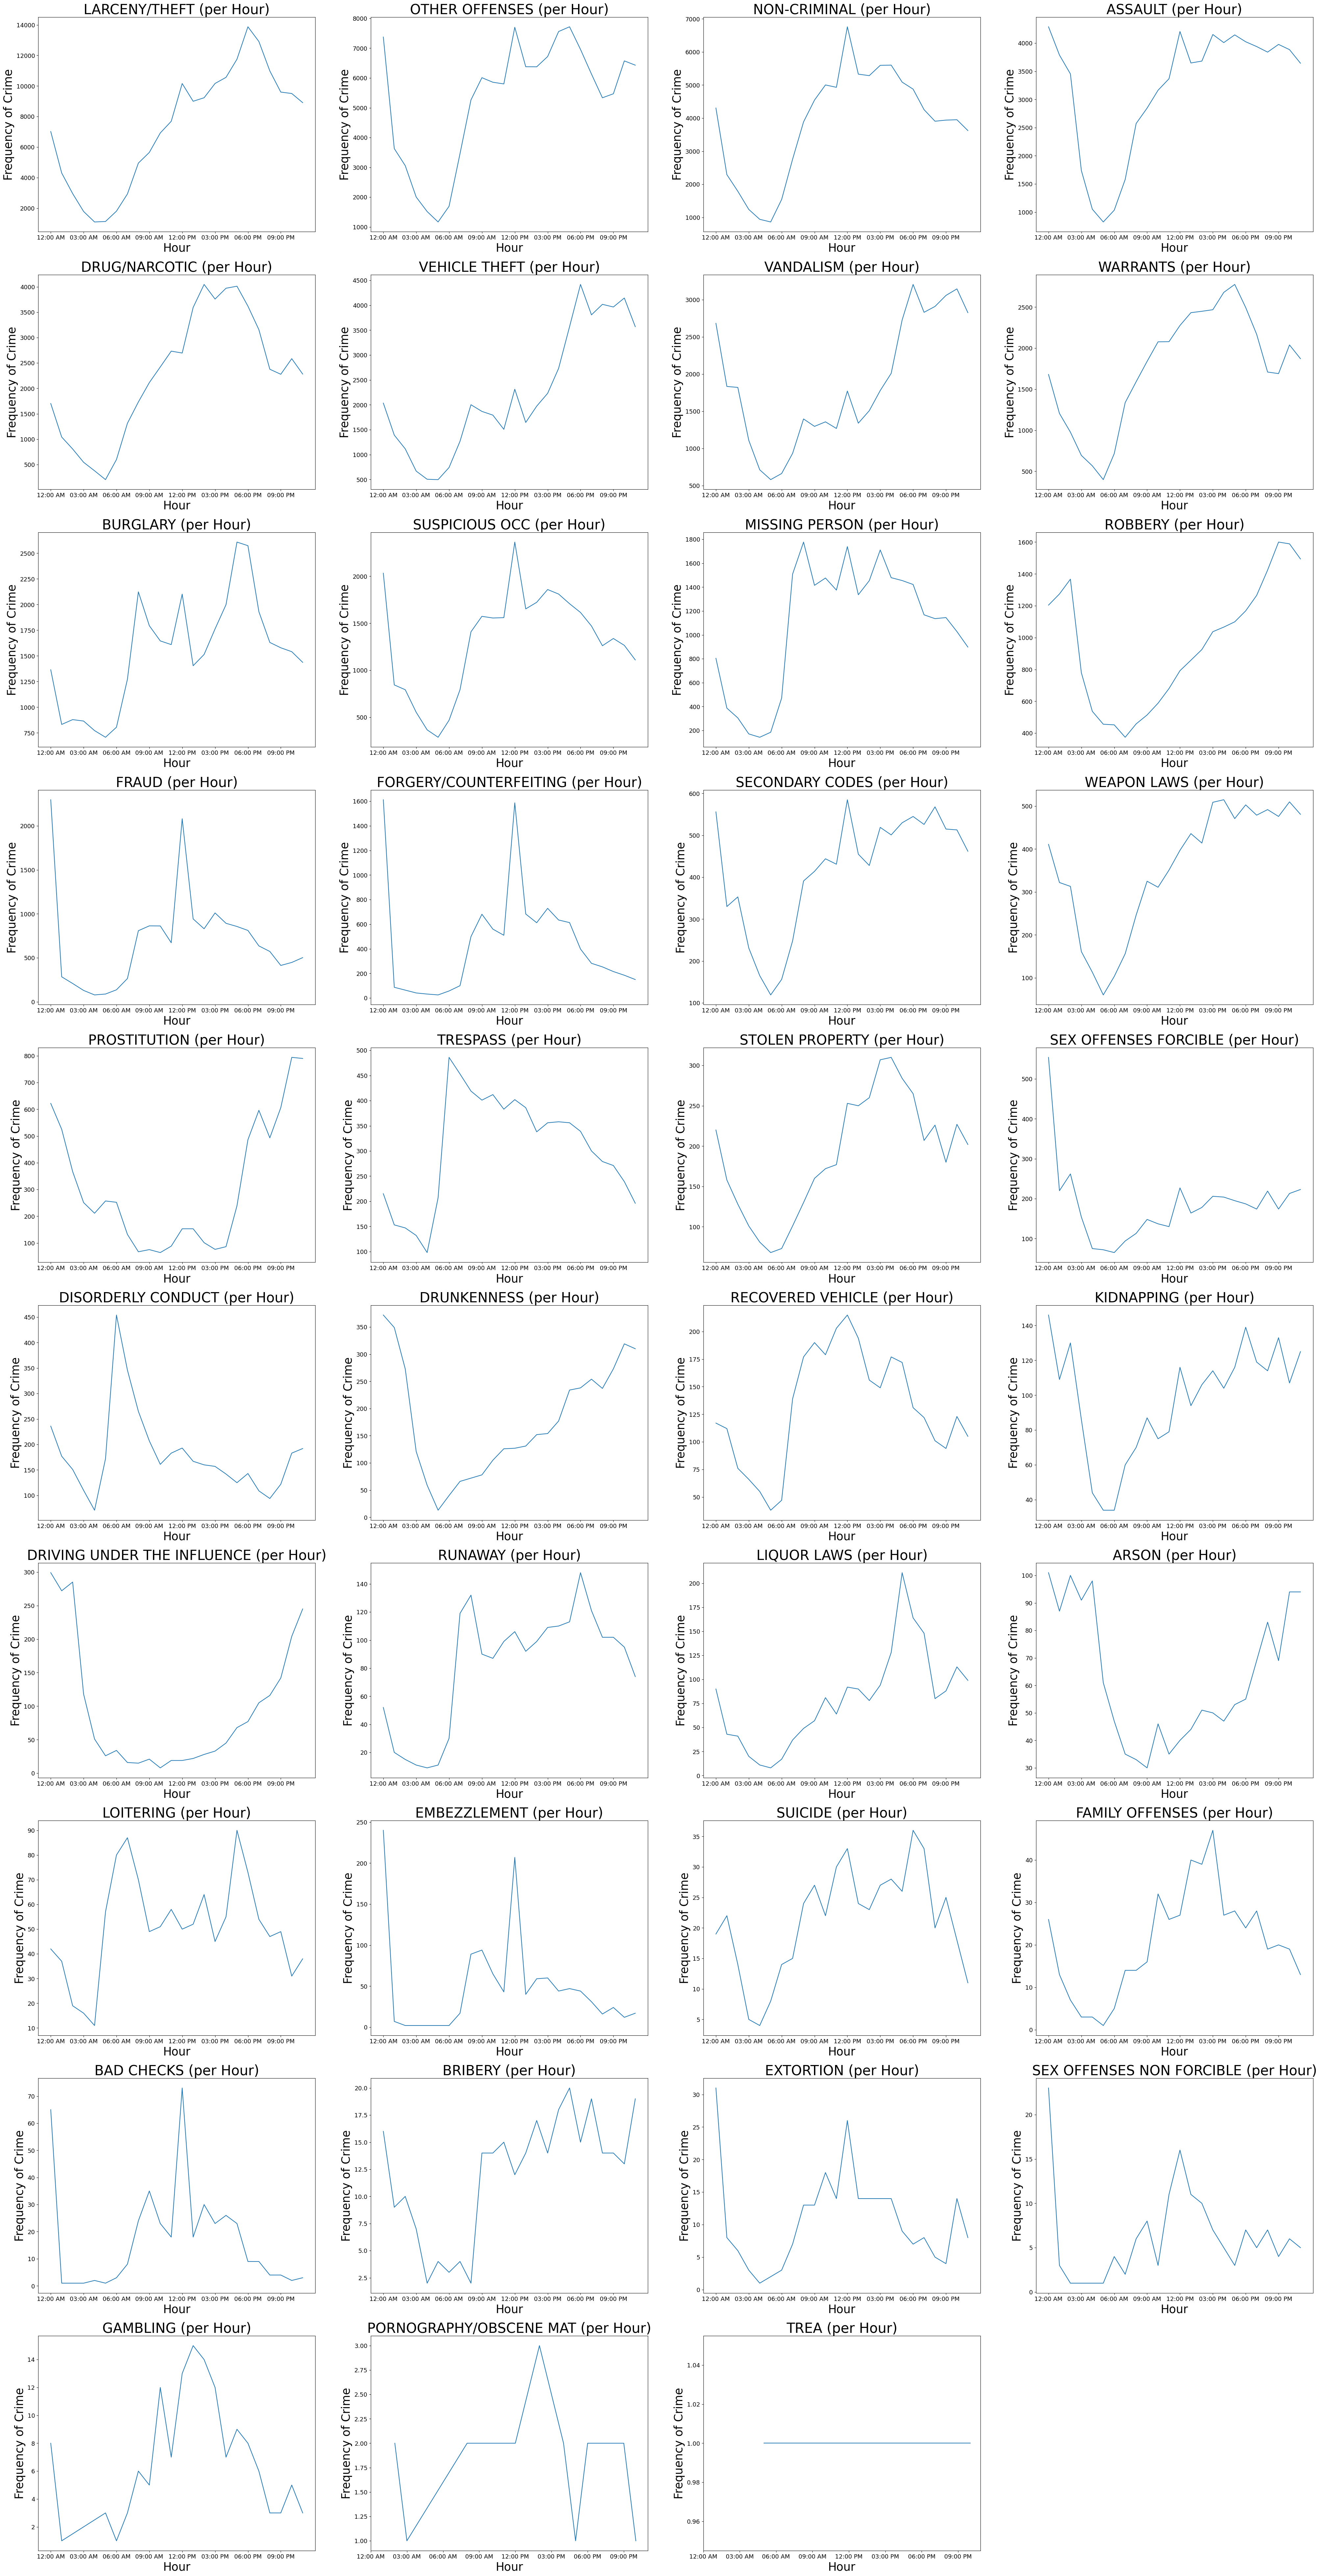

In [38]:
plot_temporal_feature(df, 'Hour', crime_category_names, convert_time, xtick_inc=3)

In [32]:
# crime_per_month = pd.to_datetime(df['Dates'], format="%Y-%m-%d %H:%M:%S").dt.month.value_counts().sort_index()
crime_per_month = df['Month'].value_counts().sort_index()
crime_per_month

1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: Month, dtype: int64

In [33]:
# Used to convert month numbers to month names
import calendar

def convert_month(num):
    return calendar.month_abbr[num]

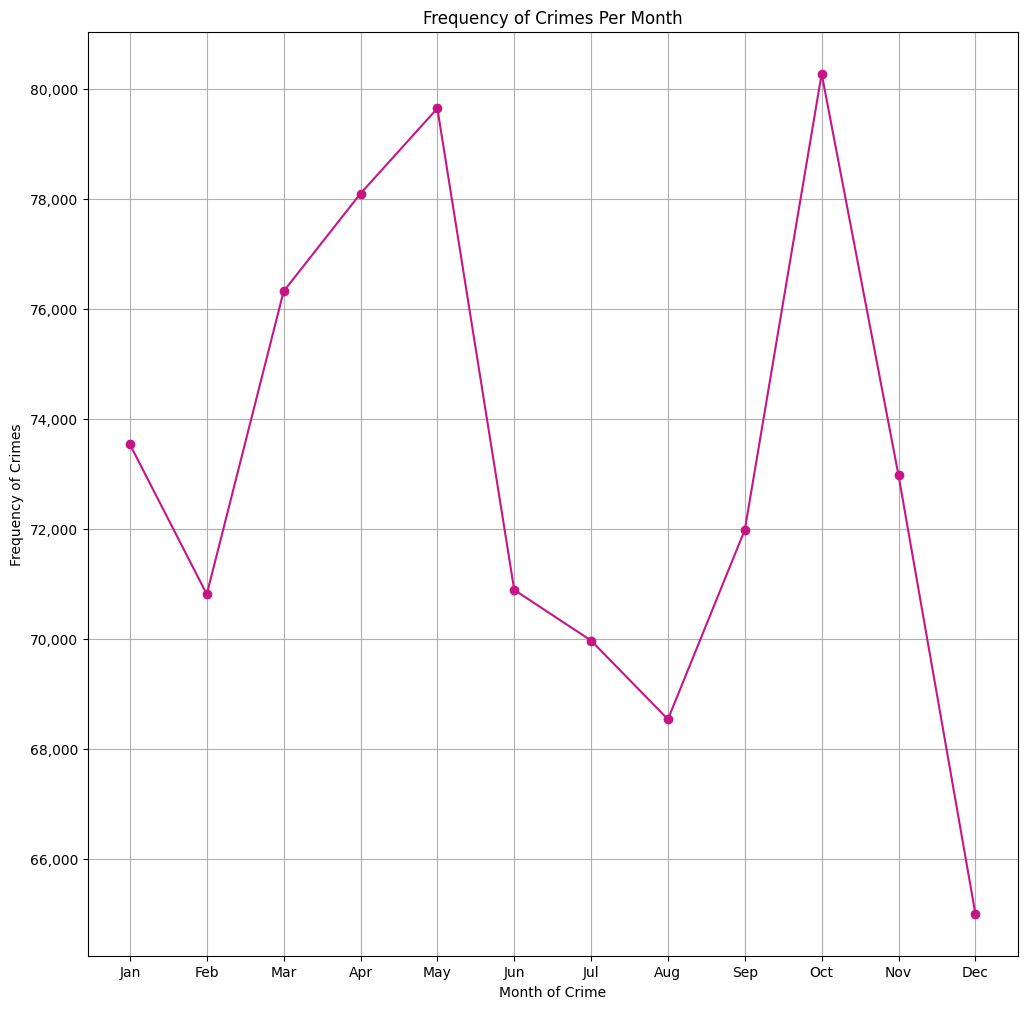

In [34]:
fig=plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per Month")
plt.xlabel("Month of Crime")
plt.ylabel("Frequency of Crimes")

ax = crime_per_month.plot(grid=True, marker='o', color='mediumvioletred')

ax.set_xticks(crime_per_month.index)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: convert_month(x)))

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

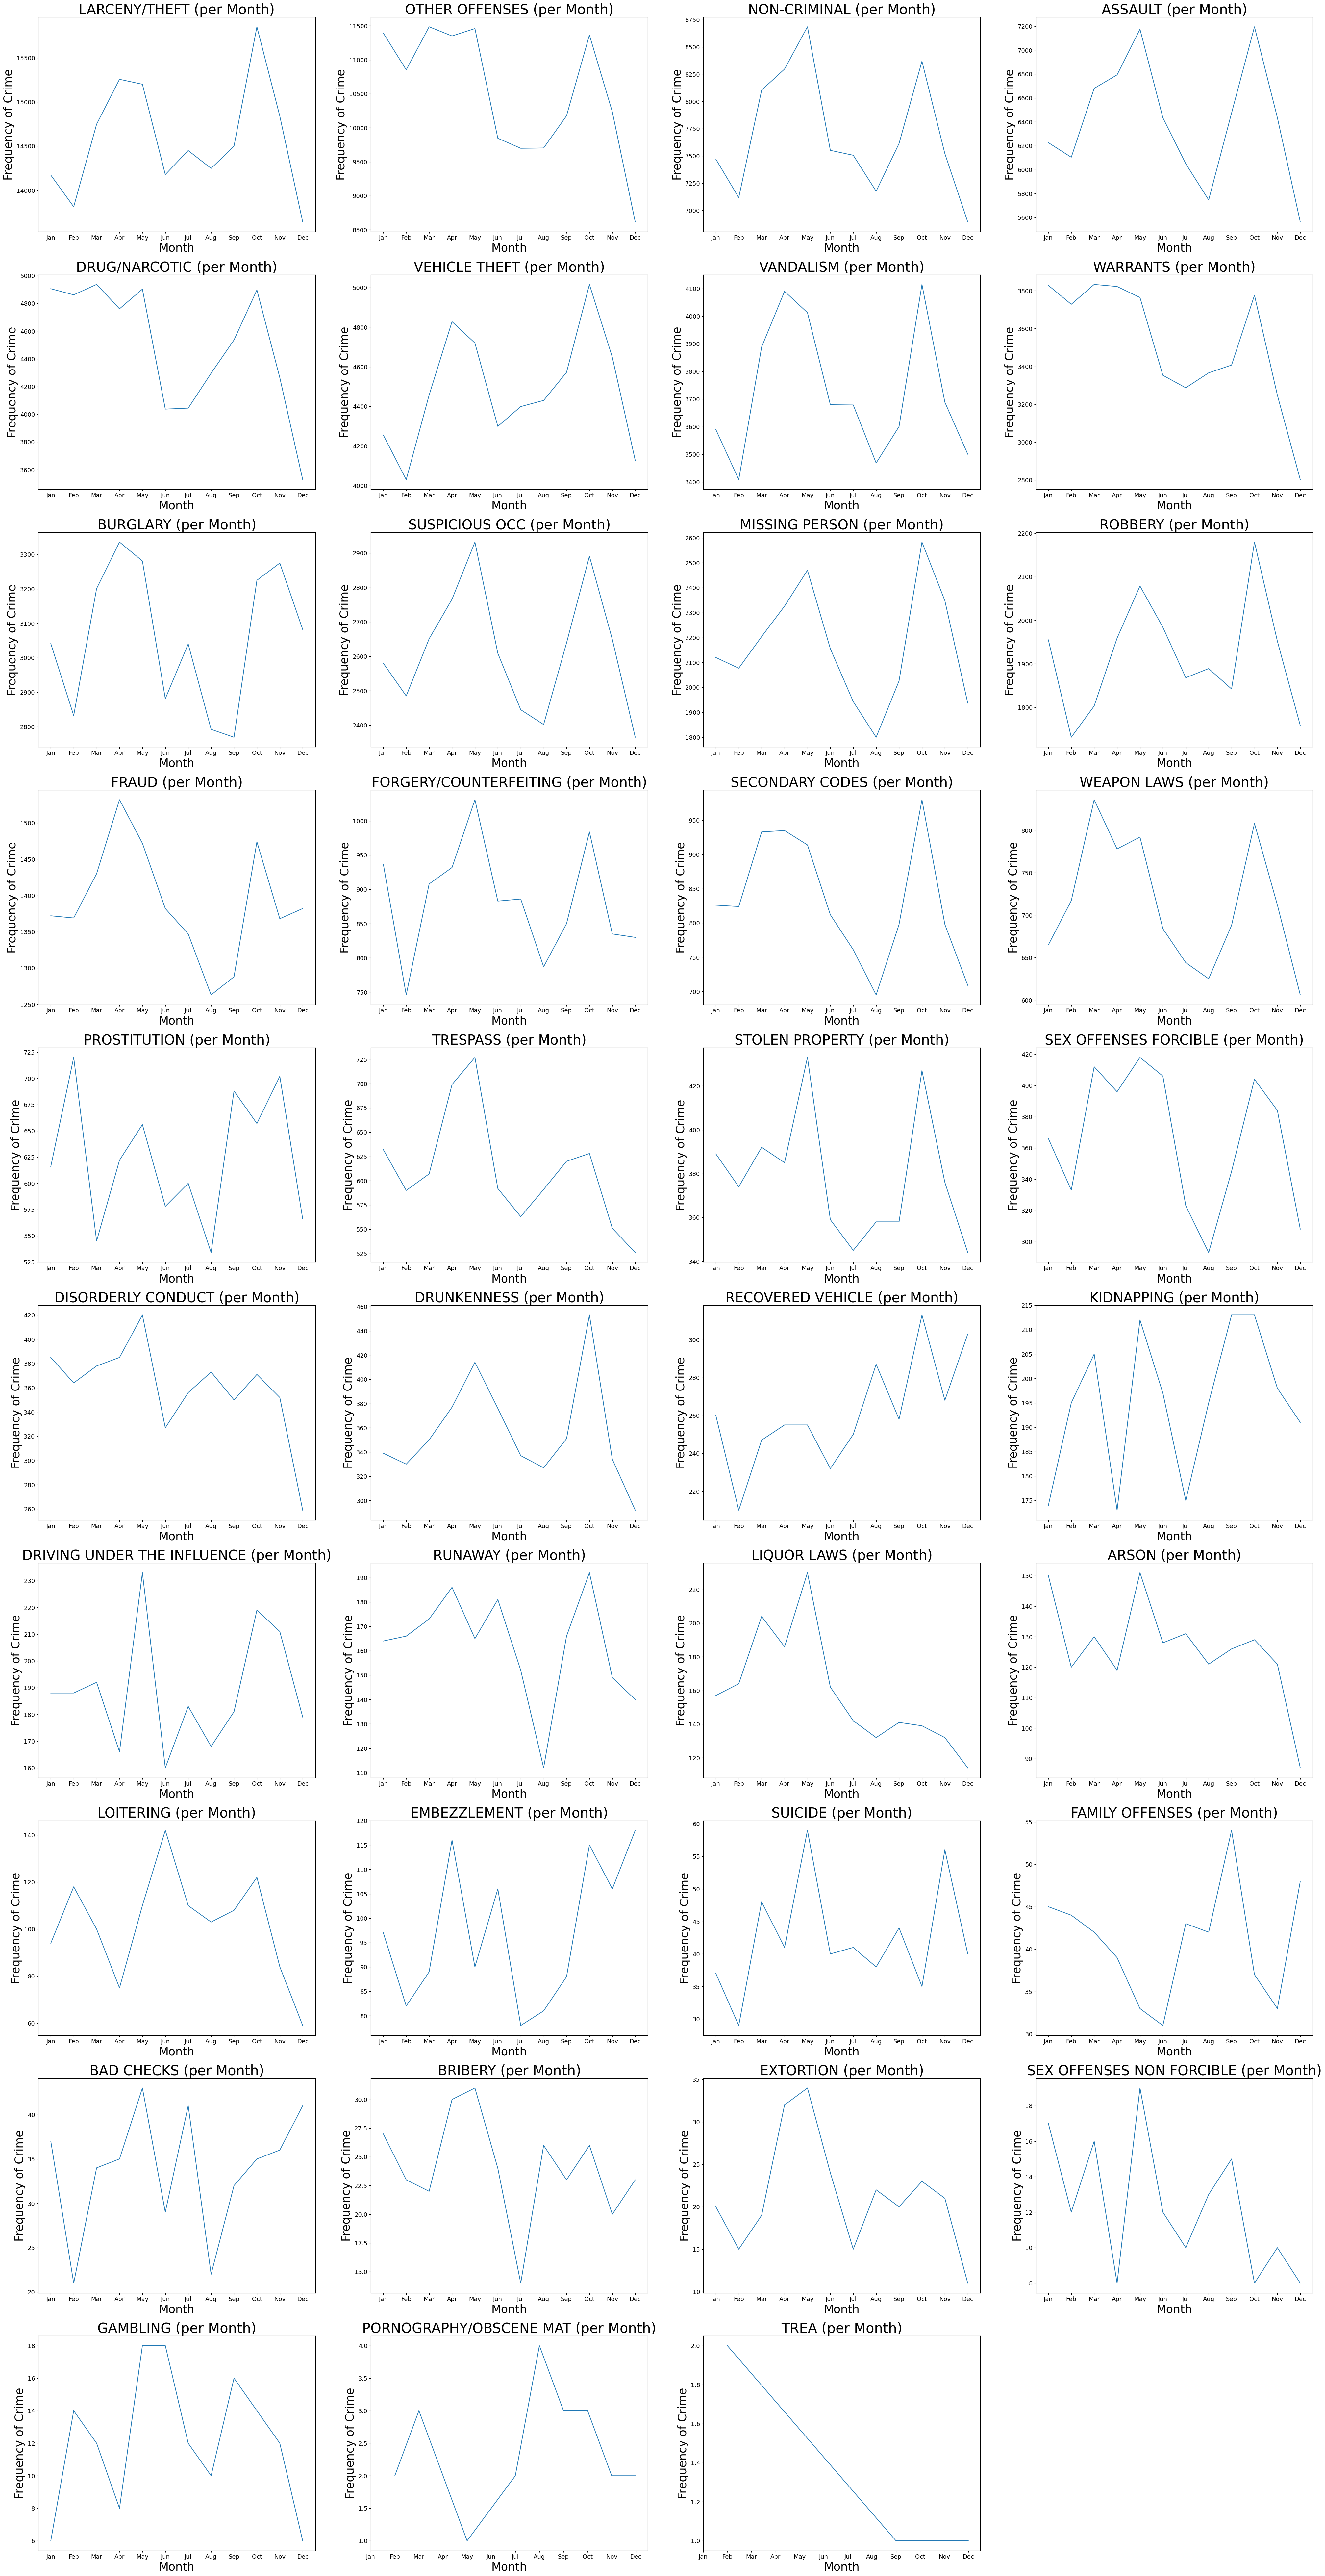

In [36]:
plot_temporal_feature(df, 'Month', crime_category_names, convert_month, xtick_inc=1)


In [39]:
## Used to order the categories
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], 
                                 categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
                                 ordered=True)


crime_per_day = df['DayOfWeek'].value_counts().sort_index()
crime_per_day.index.values

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [40]:
crime_per_day

Monday       121584
Tuesday      124965
Wednesday    129211
Thursday     125038
Friday       133734
Saturday     126810
Sunday       116707
Name: DayOfWeek, dtype: int64

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

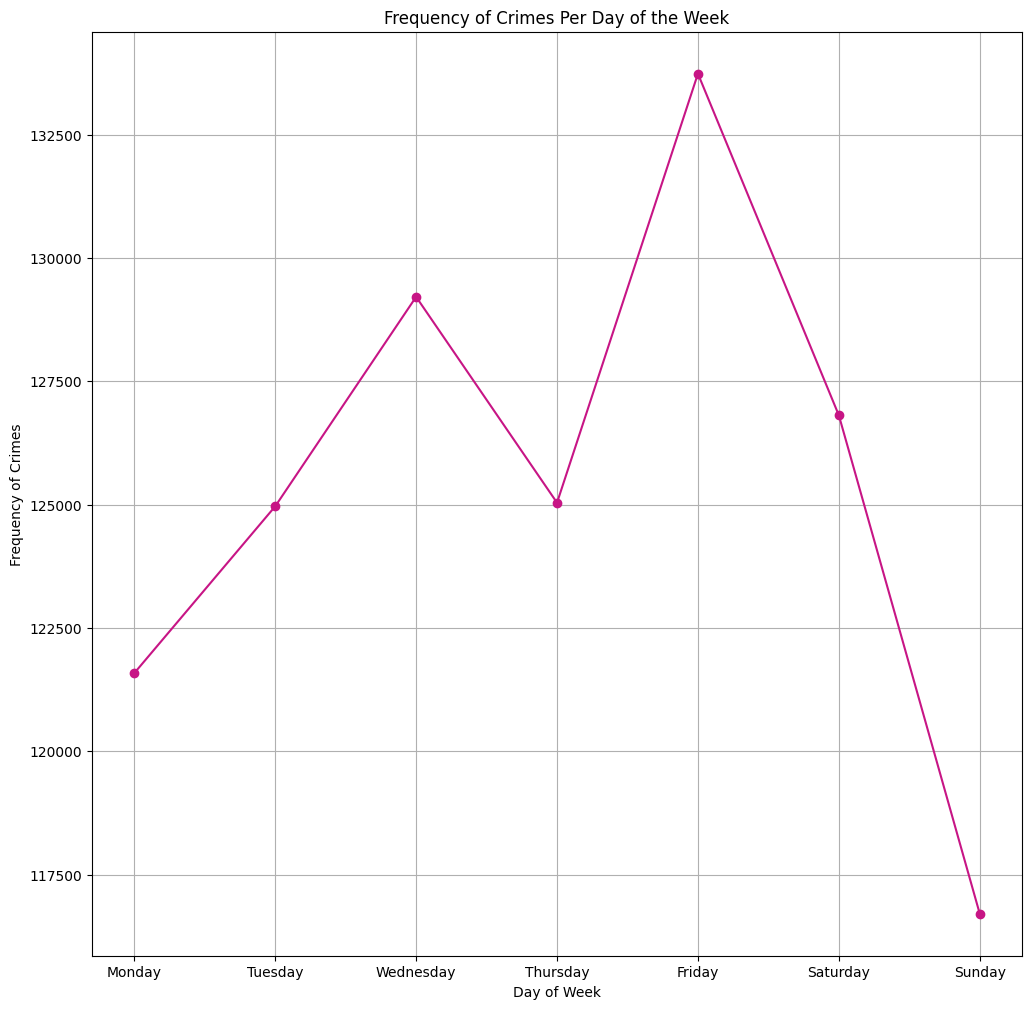

In [41]:
fig = plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Frequency of Crimes")

# ax = crime_per_day.plot(kind='barh')
ax = crime_per_day.plot(grid=True, marker='o', color='mediumvioletred')

# Quick Note for string X tick labels:
# .set_xticks() on the axes will set the locations and set_xticklabels() will set the displayed text.
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(crime_per_day.index)

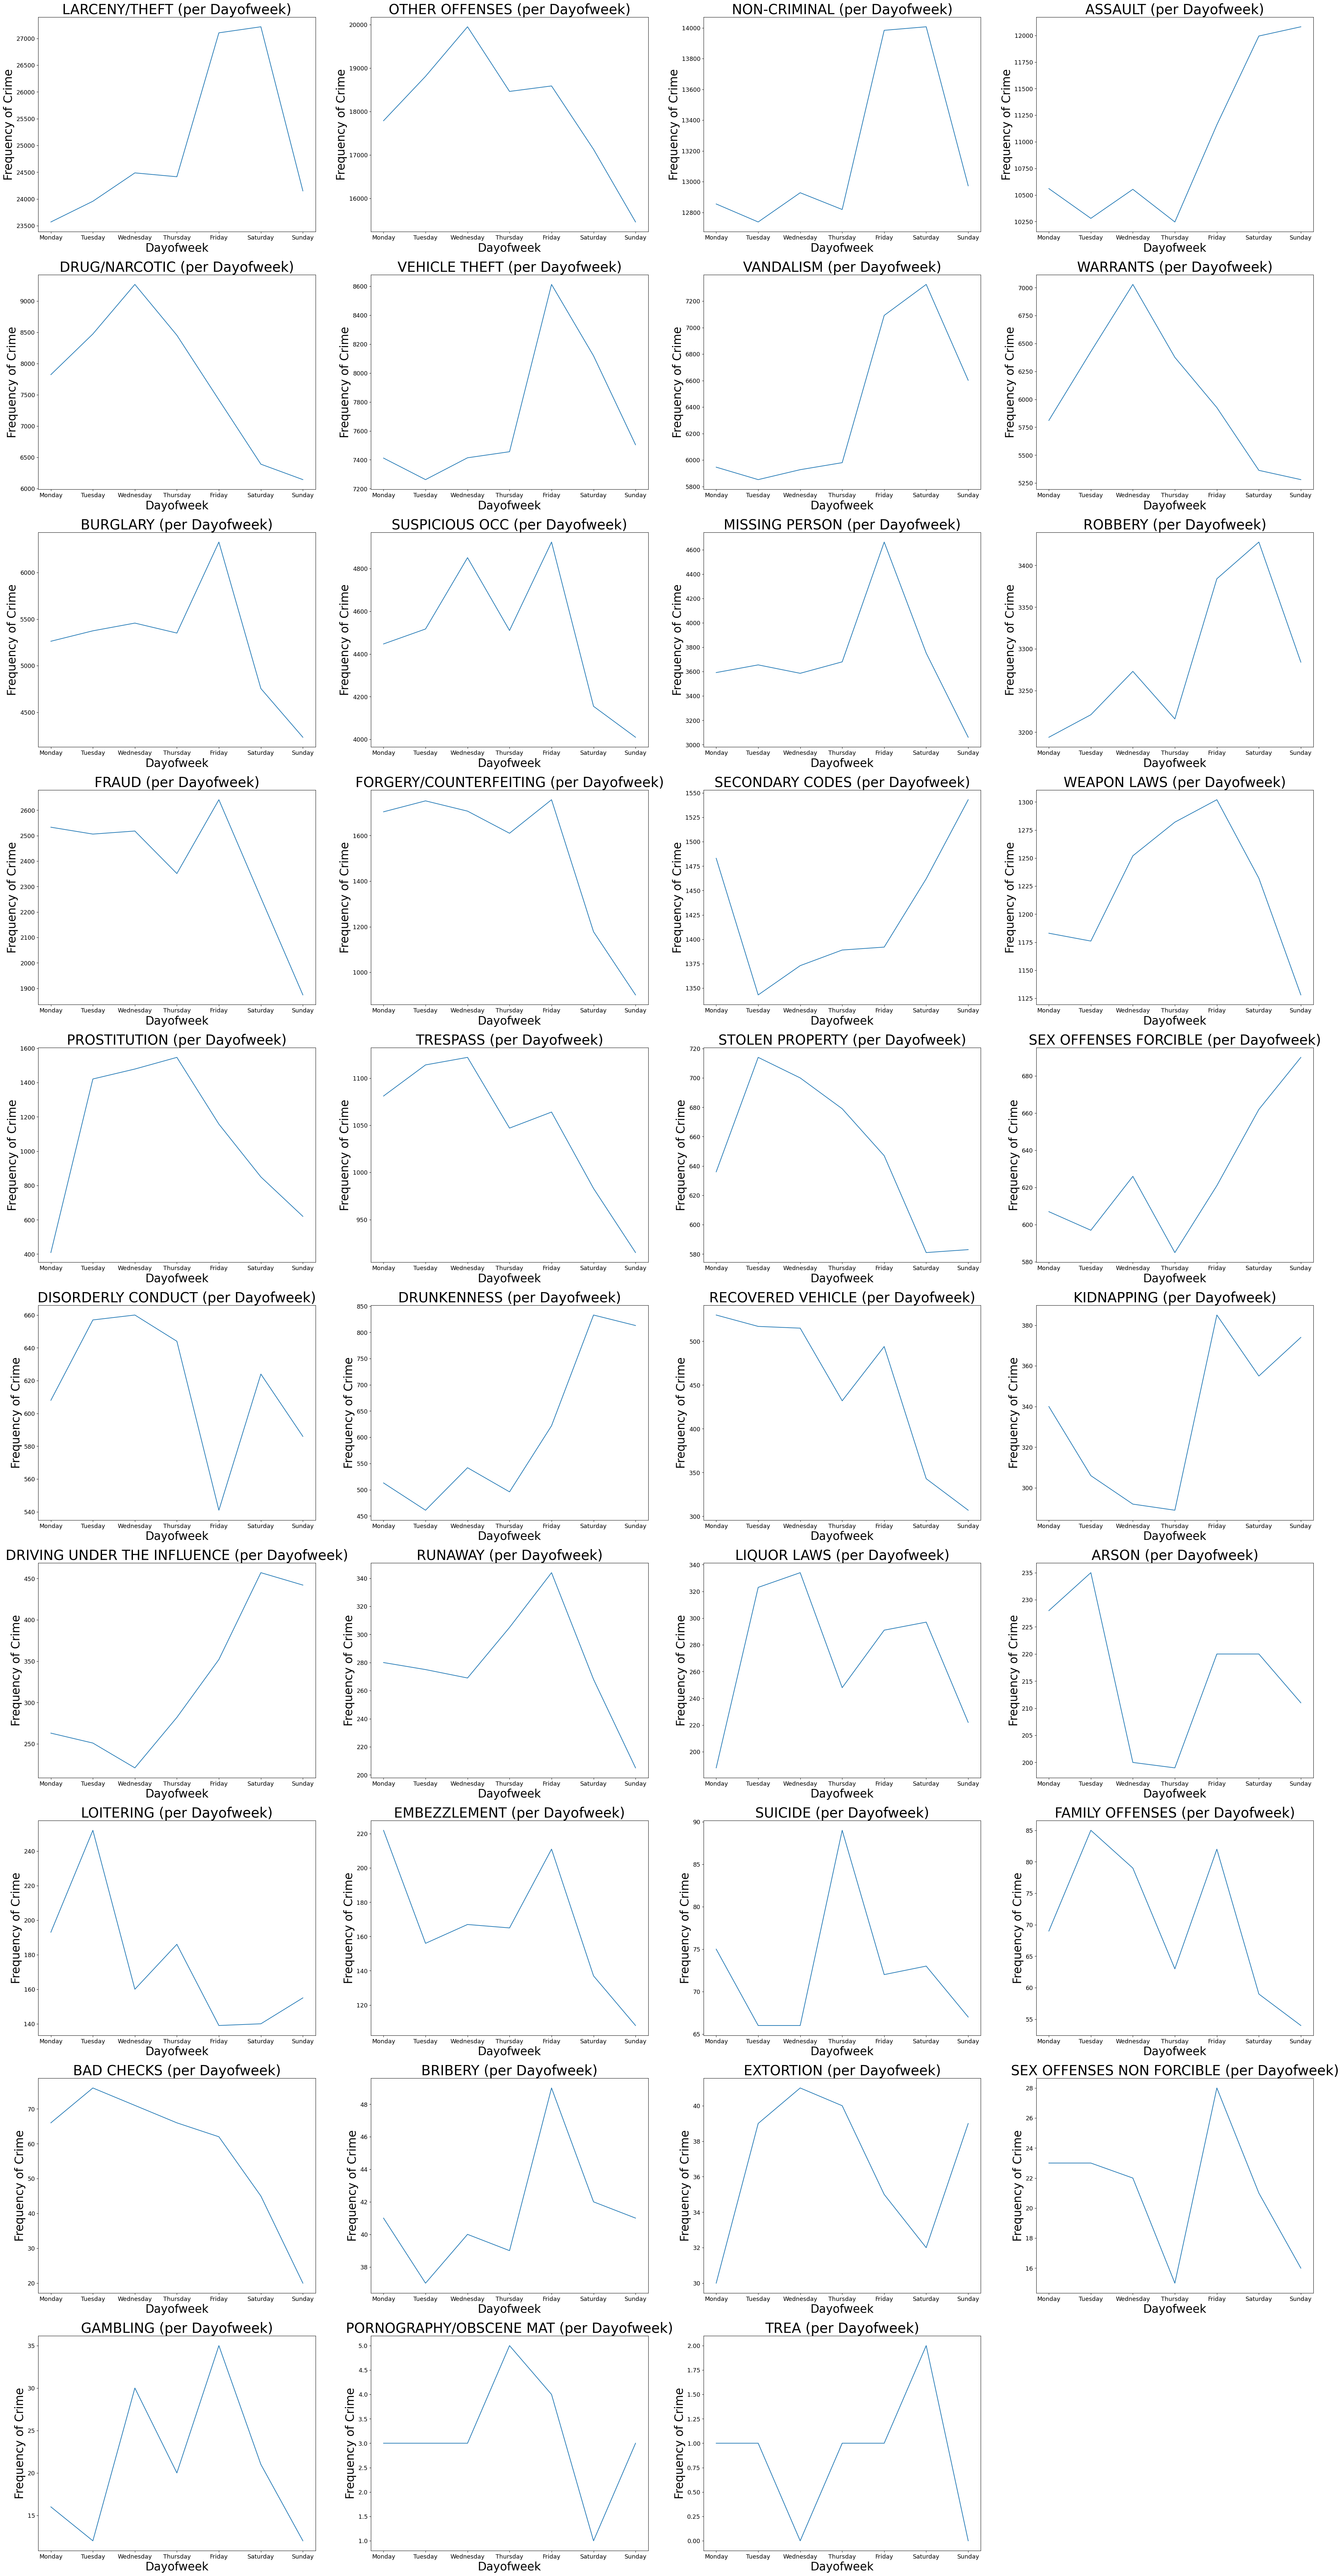

In [42]:
plot_temporal_feature(df, 'DayOfWeek', crime_category_names, None, None)

In [43]:
crime_per_year = df["Year"].value_counts().sort_index()
crime_per_year

2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
Name: Year, dtype: int64

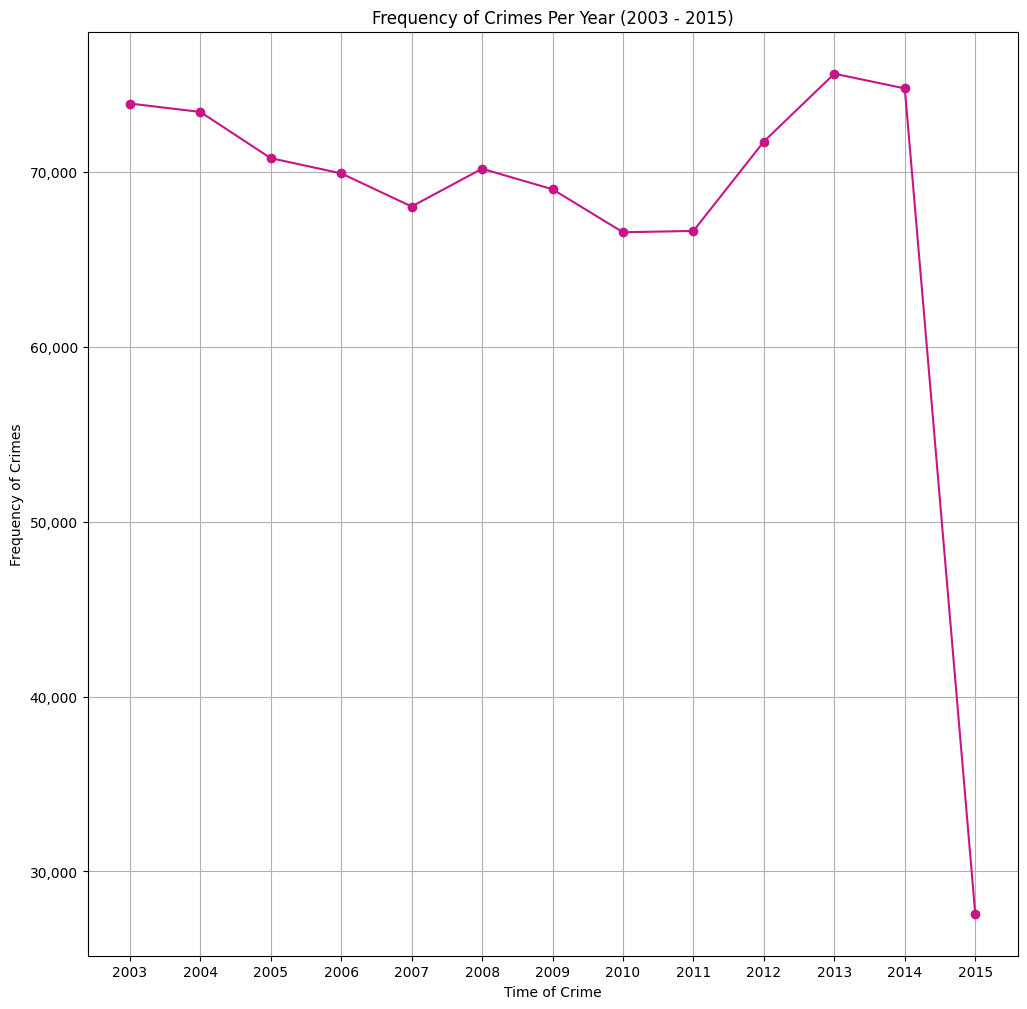

In [44]:
# Plot all crimes over the 24 hours
fig=plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per Year (2003 - 2015)")
plt.xlabel("Time of Crime")
plt.ylabel("Frequency of Crimes")


ax = crime_per_year.plot(grid=True, marker='o', color='mediumvioletred')

ax.set_xticks(crime_per_year.index)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [45]:
df{}

Dates                Category  \
0      2015-05-13 23:53:00                WARRANTS   
1      2015-05-13 23:53:00          OTHER OFFENSES   
2      2015-05-13 23:33:00          OTHER OFFENSES   
3      2015-05-13 23:30:00           LARCENY/THEFT   
4      2015-05-13 23:30:00           LARCENY/THEFT   
...                    ...                     ...   
878044 2003-01-06 00:15:00                 ROBBERY   
878045 2003-01-06 00:01:00           LARCENY/THEFT   
878046 2003-01-06 00:01:00           LARCENY/THEFT   
878047 2003-01-06 00:01:00               VANDALISM   
878048 2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek PdDistrict  \
0                                  WARRANT ARREST  Wednesday   NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   
...                                           ...        ...        ...   
878044           ROBBERY ON THE STREET WITH A GUN     Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO     Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO     Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES     Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)     Monday    BAYVIEW   

            Resolution                     Address           X          Y  \
0       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
1       ARREST, BOOKED          OAK ST / LAGUNA ST -122.425892  37.774599   
2       ARREST, BOOKED   VANNESS AV / GREENWICH ST -122.424363  37.800414   
3                 NONE    1500 Block of LOMBARD ST -122.426995  37.800873   
4                 NONE   100 Block of BRODERICK ST -122.438738  37.771541   
...                ...                         ...         ...        ...   
878044            NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056   
878045            NONE        600 Block of EDNA ST -122.447364  37.731948   
878046            NONE          5TH ST / FOLSOM ST -122.403390  37.780266   
878047            NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607   
878048            NONE    1800 Block of NEWCOMB AV -122.394926  37.738212   

        Hour  Month  Year  
0         23      5  2015  
1         23      5  2015  
2         23      5  2015  
3         23      5  2015  
4         23      5  2015  
...      ...    ...   ...  
878044     0      1  2003  
878045     0      1  2003  
878046     0      1  2003  
878047     0      1  2003  
878048     0      1  2003  

[878049 rows x 12 columns]